In [1]:
# Data manipulation
import pickle
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="white")

In [2]:
# Read data
data = pickle.load(open('data/clean.pkl', 'rb'))

In [3]:
# Number of employee
len(set(data['ID']))

33

In [4]:
# Check if employee data evolve.
data.groupby('ID').nunique().dropna().sum()

Reason for absence                 228
Month of absence                   224
Day of the week                    132
Seasons                            106
Transportation expense              33
Distance from Residence to Work     33
Service time                        33
Age                                 33
Work load Average/day              366
Hit target                         222
Disciplinary failure                33
Education                           33
Children                            33
Social drinker                      33
Social smoker                       33
Pet                                 33
Weight                              33
Height                              33
Body mass index                     33
Absenteeism                        167
dtype: int64

In [5]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target',
       'Disciplinary failure', 'Education', 'Children', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism'],
      dtype='object')

In [29]:
# 1 row by employee | number of absence + total missed time
employee_df = data.groupby('ID').mean()
employee_df = employee_df.drop(['Absenteeism', 'Disciplinary failure'], axis=1)
absence_number = data.groupby('ID').count()['Absenteeism']
asbence_hour = data.groupby('ID').sum()['Absenteeism']
employee_df['Number of Absence'] = absence_number
employee_df['Total Time Missed'] = asbence_hour
employee_df = employee_df.dropna().reset_index(drop=False)

In [30]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               33 non-null     category
 1   Transportation expense           33 non-null     float64 
 2   Distance from Residence to Work  33 non-null     float64 
 3   Service time                     33 non-null     float64 
 4   Age                              33 non-null     float64 
 5   Work load Average/day            33 non-null     float64 
 6   Hit target                       33 non-null     float64 
 7   Children                         33 non-null     float64 
 8   Social drinker                   33 non-null     float64 
 9   Social smoker                    33 non-null     float64 
 10  Pet                              33 non-null     float64 
 11  Weight                           33 non-null     float64 
 12  Height    

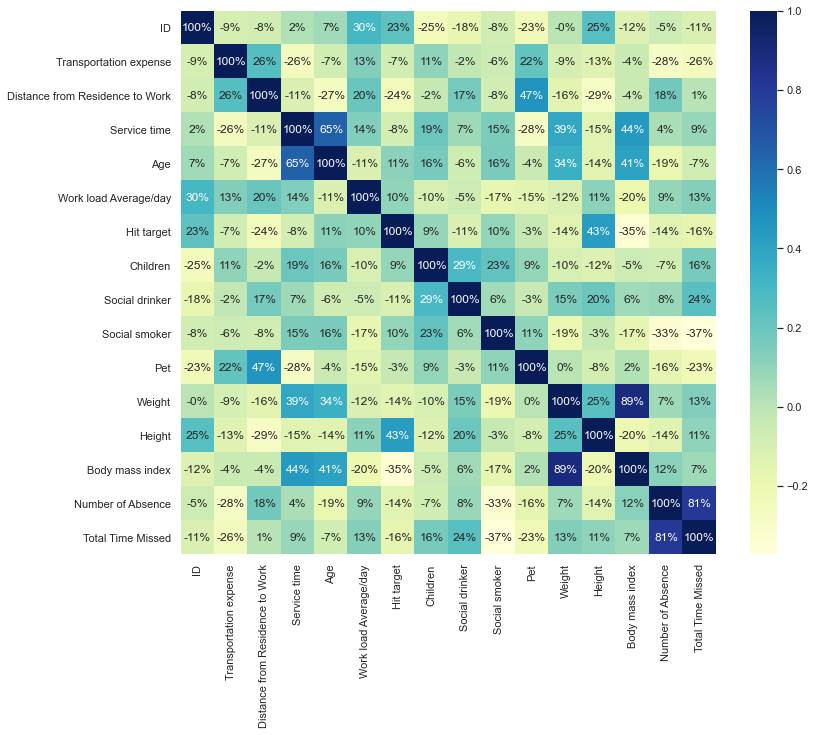

In [20]:
# Corr
plt.figure(figsize=(12, 10))
sns.heatmap(employee_df.corr(), annot=True, cmap="YlGnBu", fmt='.0%')
plt.show()

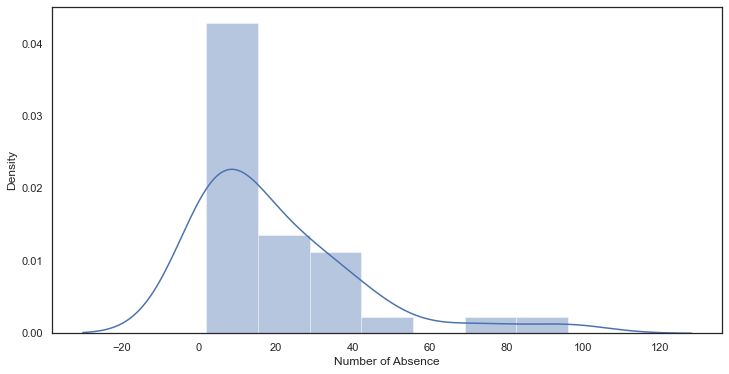

In [31]:
# Density
plt.figure(figsize=(12, 6))
sns.distplot(employee_df['Number of Absence'])
plt.show()